### 1. Installing libraries

In [3]:
# verilen yoldaki tüm dosyaların okunması için
import glob
# bir veya birden fazla resmin görüntülenmesi için
from IPython.display import Image, display


In [4]:
import os
os.getcwd()
os.chdir("/content/drive/MyDrive/BitirmeProjesi")

In [5]:
HOME=os.getcwd()
print(HOME)


/content/drive/MyDrive/BitirmeProjesi


### 2. GPU erişim kontrolü

In [ ]:
!nvidia-smi

Sun May 21 17:28:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 3. YOLOv8 in pip paket yöneticisyle indirilmesi
Daha önce github proje klonlanmasıyla inidirilen yolo versiyon 8 ile ilk defa pip paket yöneticisiyle indirilmeye başlandı

In [ ]:
!pip install ultralytics==8.0.98
import ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.98 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 26.0/166.8 GB disk)


### 4. Bone Fracture verisetinin indirilmesi
Roboflow sitesinden indirilen veriseti train, validation, test olarak %75, %10 ve %15 oranlarında toplam 1036 adettir.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0wqEhIa6g1nmWIFIRMtA")
project = rf.workspace("fracture-uofxm").project("bone-fracture-detection-ivsy6")
dataset = project.version(1).download("yolov8")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=c25db8c55f0e416f6ead22407f08e4a34886eaf1638e1baf83ee936060a4cc5e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics<=8.0.20`, to intall it `pip install ultralytics<=8.0.20`.


Extracting Dataset Version Zip to Bone-fracture-detection-1 in yolov8:: 100%|██████████| 2084/2084 [00:14<00:00, 145.30it/s]


### Resim örneklerinin görüntülenmesi

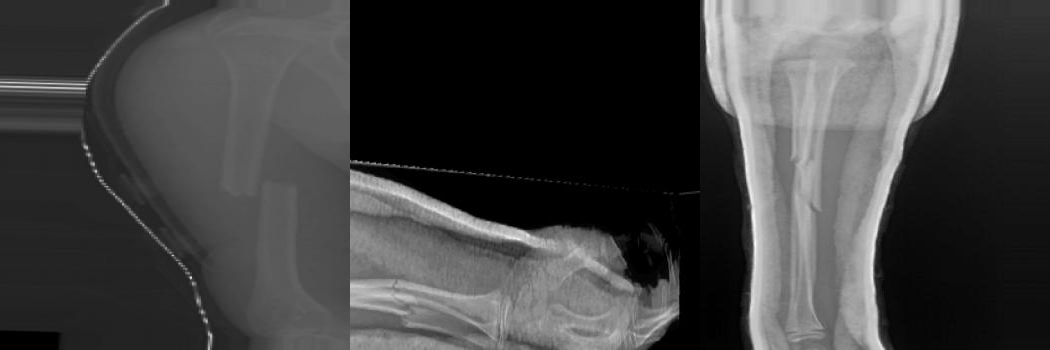

In [4]:
import os
from PIL import Image

folder_path = '/content/drive/MyDrive/BitirmeProjesi/Bone_fracture/train/images'

# Klasördeki tüm dosya isimlerini alın
file_names = os.listdir(folder_path)

# İlk üç dosyayı seçin
selected_files = file_names[:3]

# Görüntüleri yan yana görüntülemek için yeni bir resim oluşturun
total_width = 0
max_height = 0

for file_name in selected_files:
    image_path = os.path.join(folder_path, file_name)
    image = Image.open(image_path)
    total_width += image.width
    max_height = max(max_height, image.height)

# Yeni resmi oluşturun
merged_image = Image.new('RGB', (total_width, max_height))

# Görüntüleri birleştirin
x_offset = 0

for file_name in selected_files:
    image_path = os.path.join(folder_path, file_name)
    image = Image.open(image_path)
    merged_image.paste(image, (x_offset, 0))
    x_offset += image.width


merged_image.show()


###**5.1. Verinin YOLOv8 ile eğitilmesi**

In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/drive/MyDrive/BitirmeProjesi/Bone_fracture/data.yaml epochs=100 imgsz=640

New https://pypi.org/project/ultralytics/8.0.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.98 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/BitirmeProjesi/Bone_fracture/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classe

### **5.2. Verinin YOLOv8 ile eğitilmesi**

In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/drive/MyDrive/BitirmeProjesi/Bone_fracture/data.yaml epochs=100 imgsz=640 optimizer='Adam' lr0=0.008

New https://pypi.org/project/ultralytics/8.0.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.98 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/BitirmeProjesi/Bone_fracture/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, class

### **5.3. Verinin YOLOv8 ile eğitilmesi**

In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/drive/MyDrive/BitirmeProjesi/Bone_fracture/data.yaml epochs=150 imgsz=640 optimizer='Adam'

New https://pypi.org/project/ultralytics/8.0.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.98 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/BitirmeProjesi/Bone_fracture/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, class

In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/drive/MyDrive/BitirmeProjesi/Bone_fracture/data.yaml epochs=150 imgsz=640

New https://pypi.org/project/ultralytics/8.0.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.98 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/BitirmeProjesi/Bone_fracture/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classe

### 6. Hata matrisinin gösterimi
Hata matrisi farklı sınıfların model tahminlerindeki dağılımını göstermektedir.

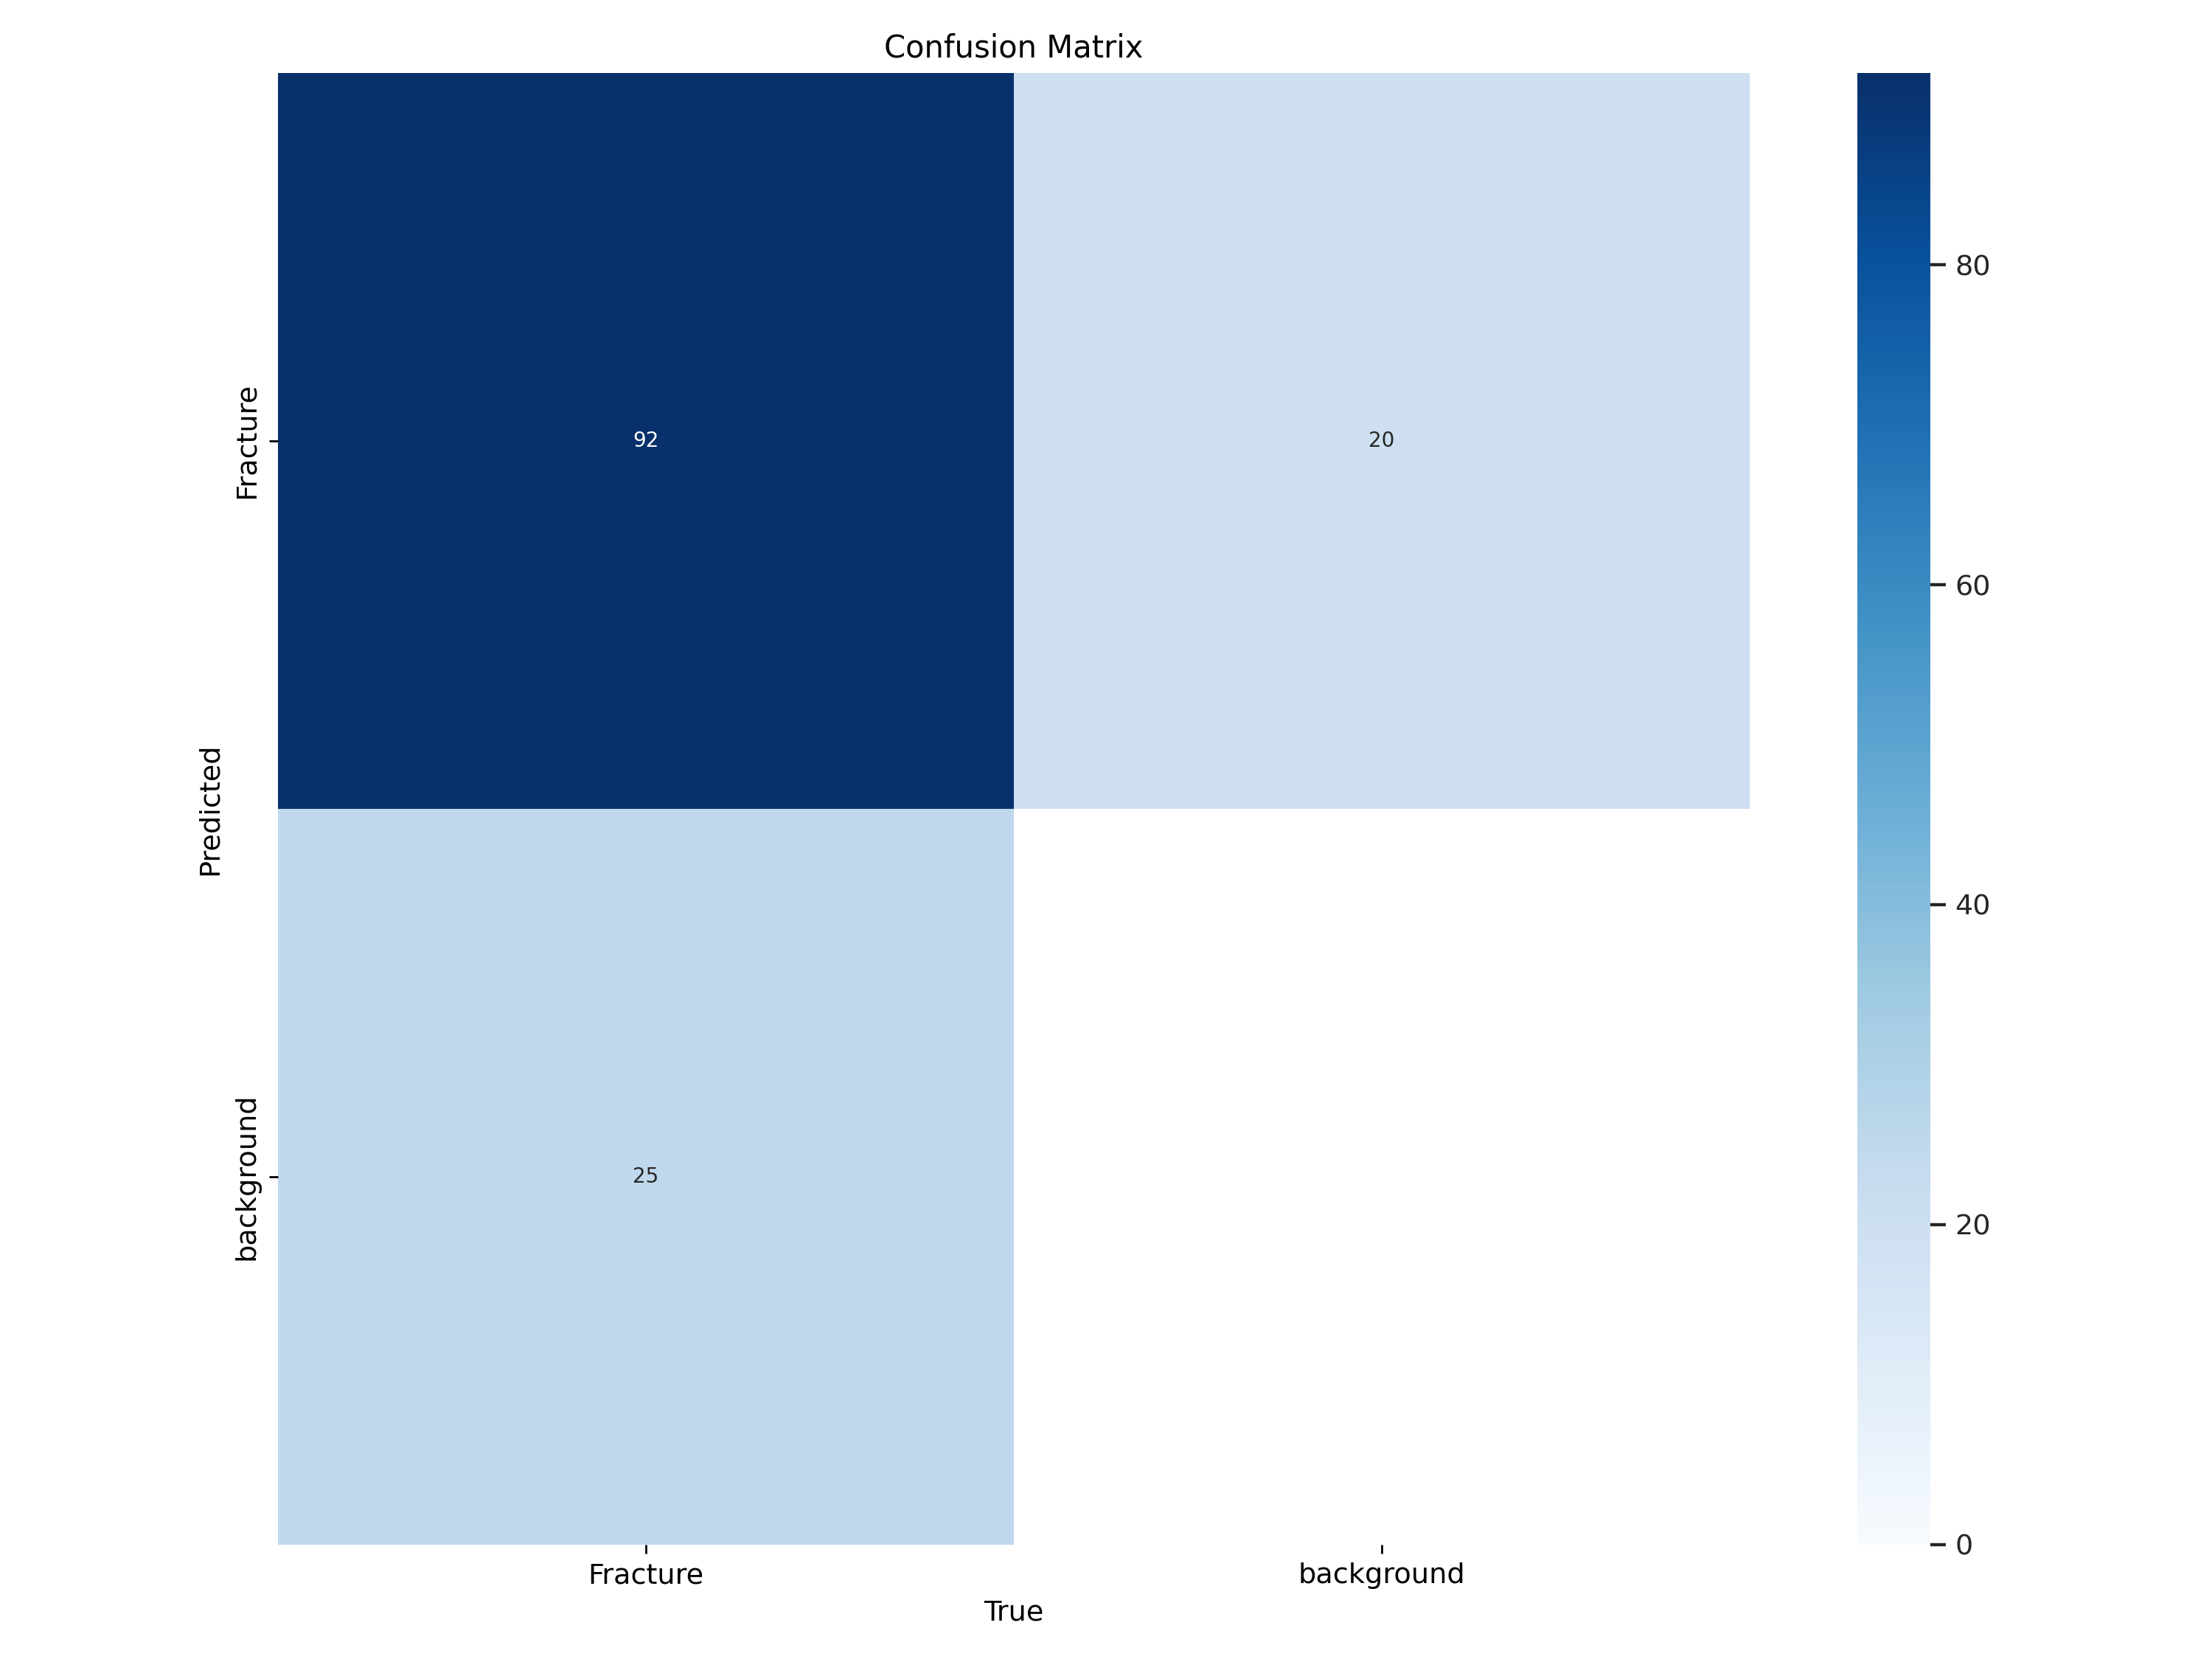

In [ ]:
Image(filename=f'/content/drive/MyDrive/BitirmeProjesi/runs/detect/train7/confusion_matrix.png', width=600)

### 7. Eğitim ve validasyon verisetlerindeki kayıplar
Burada box_loss ve class_loss grafikleri önemlidir.
Epoch boyunca kayıpların azalan trendde olmaları ve mAP değerlirinin artması modelin öğrendiğini göstermektedir.

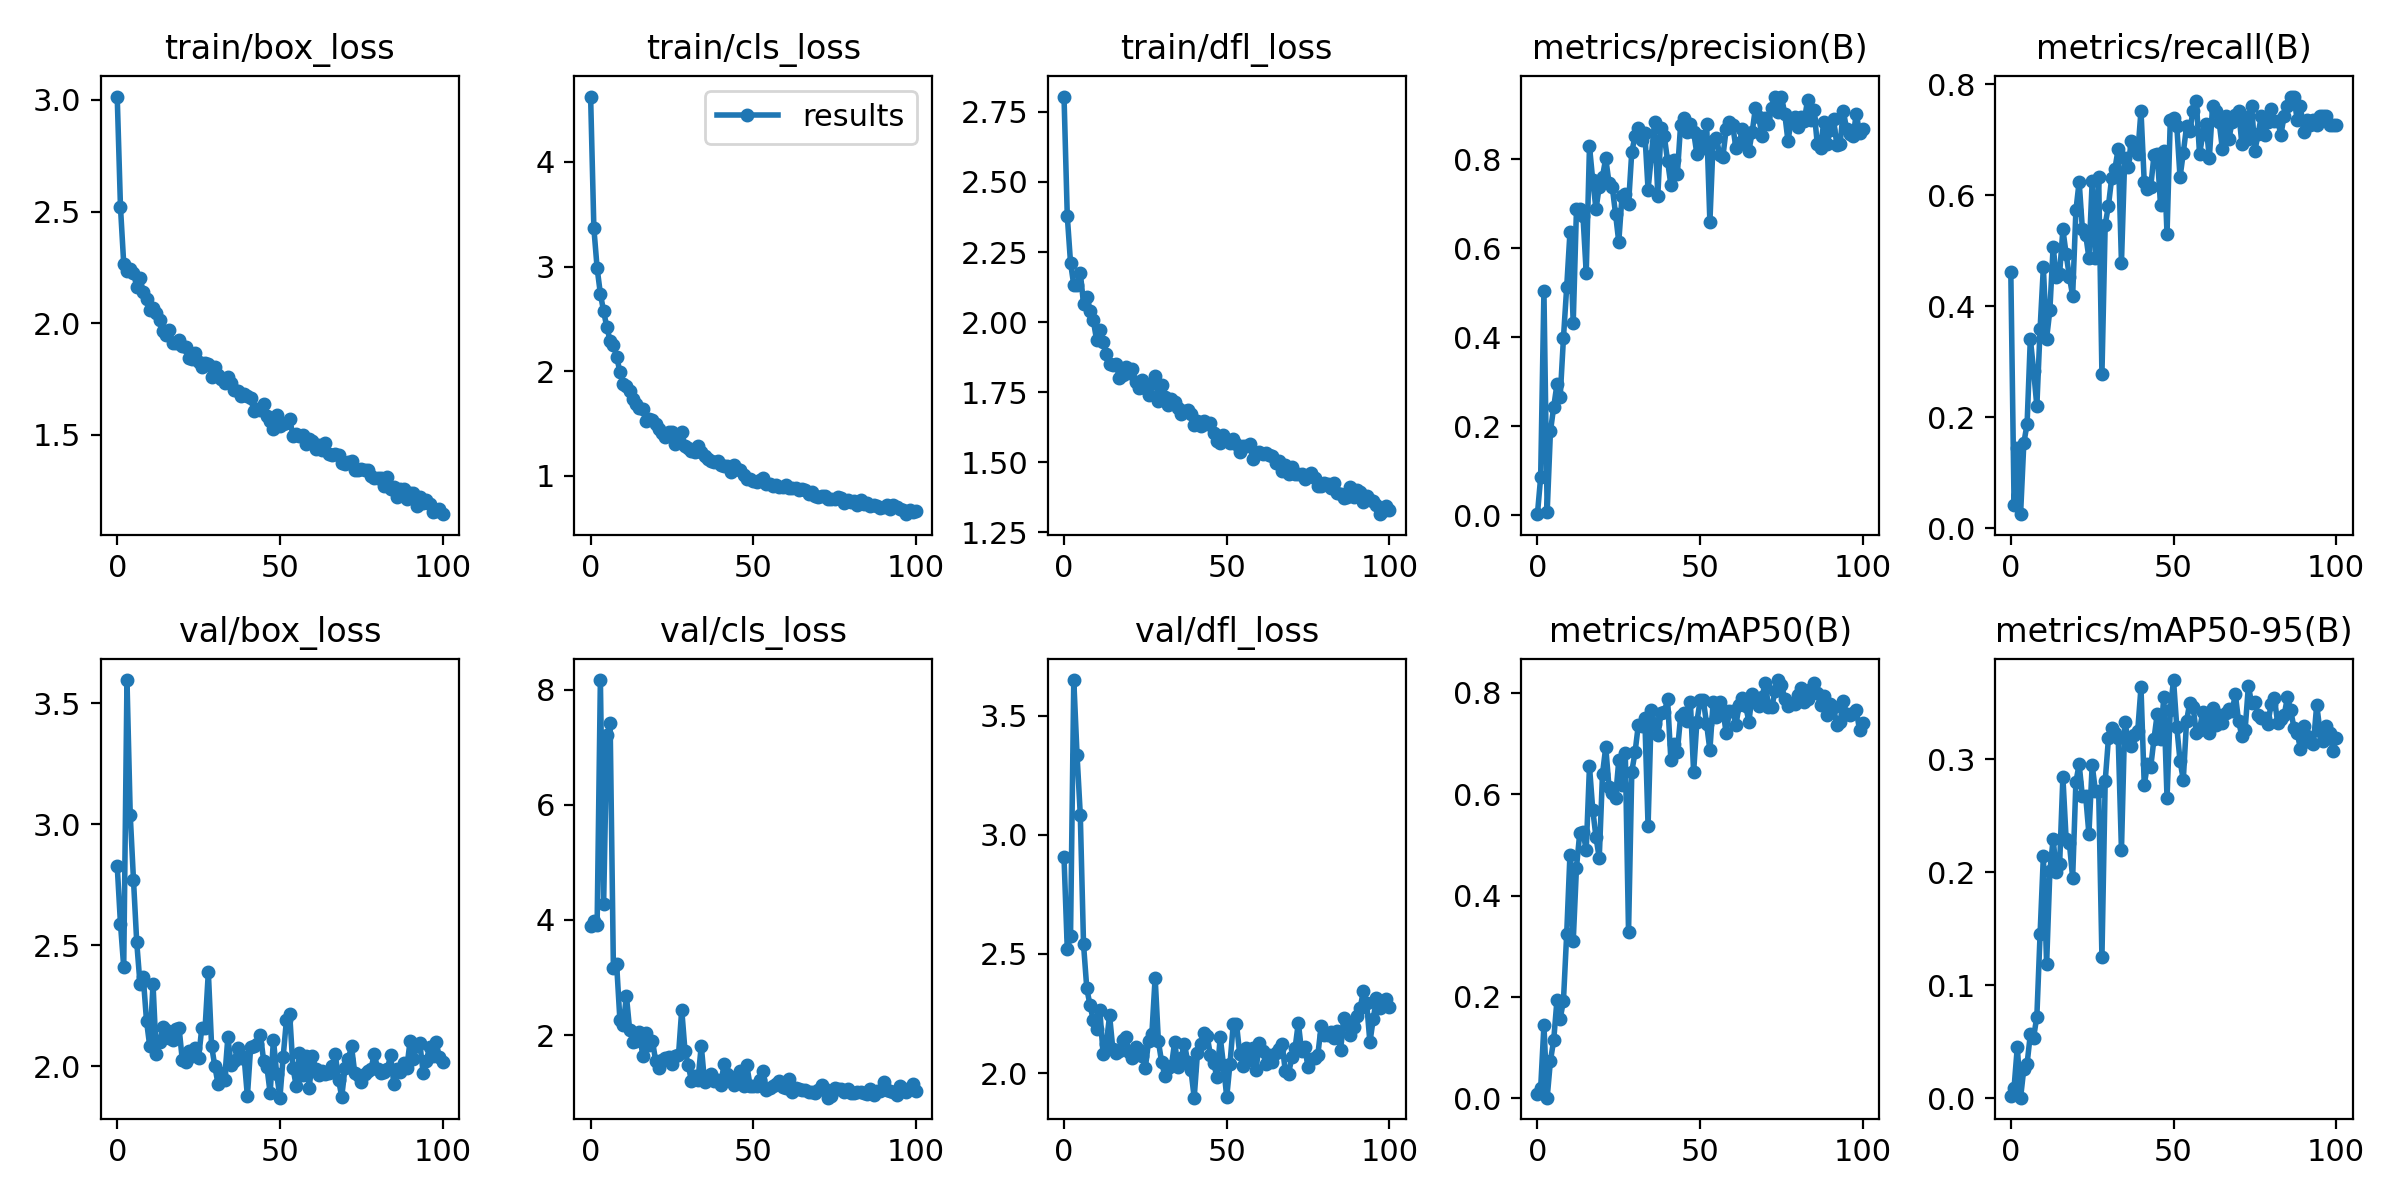

In [ ]:
Image(filename=f'/content/drive/MyDrive/BitirmeProjesi/runs/detect/train7/results.png', width=600)

### 8. Doğrulama verisetinden bazı çıktılar
Bu görüntüler sadece validaston için kullanıldıklarından modelin performansını anlamak için doğrulama veriseti üzerinden çıktılara bakmak daha sağlıklı olacaktır.


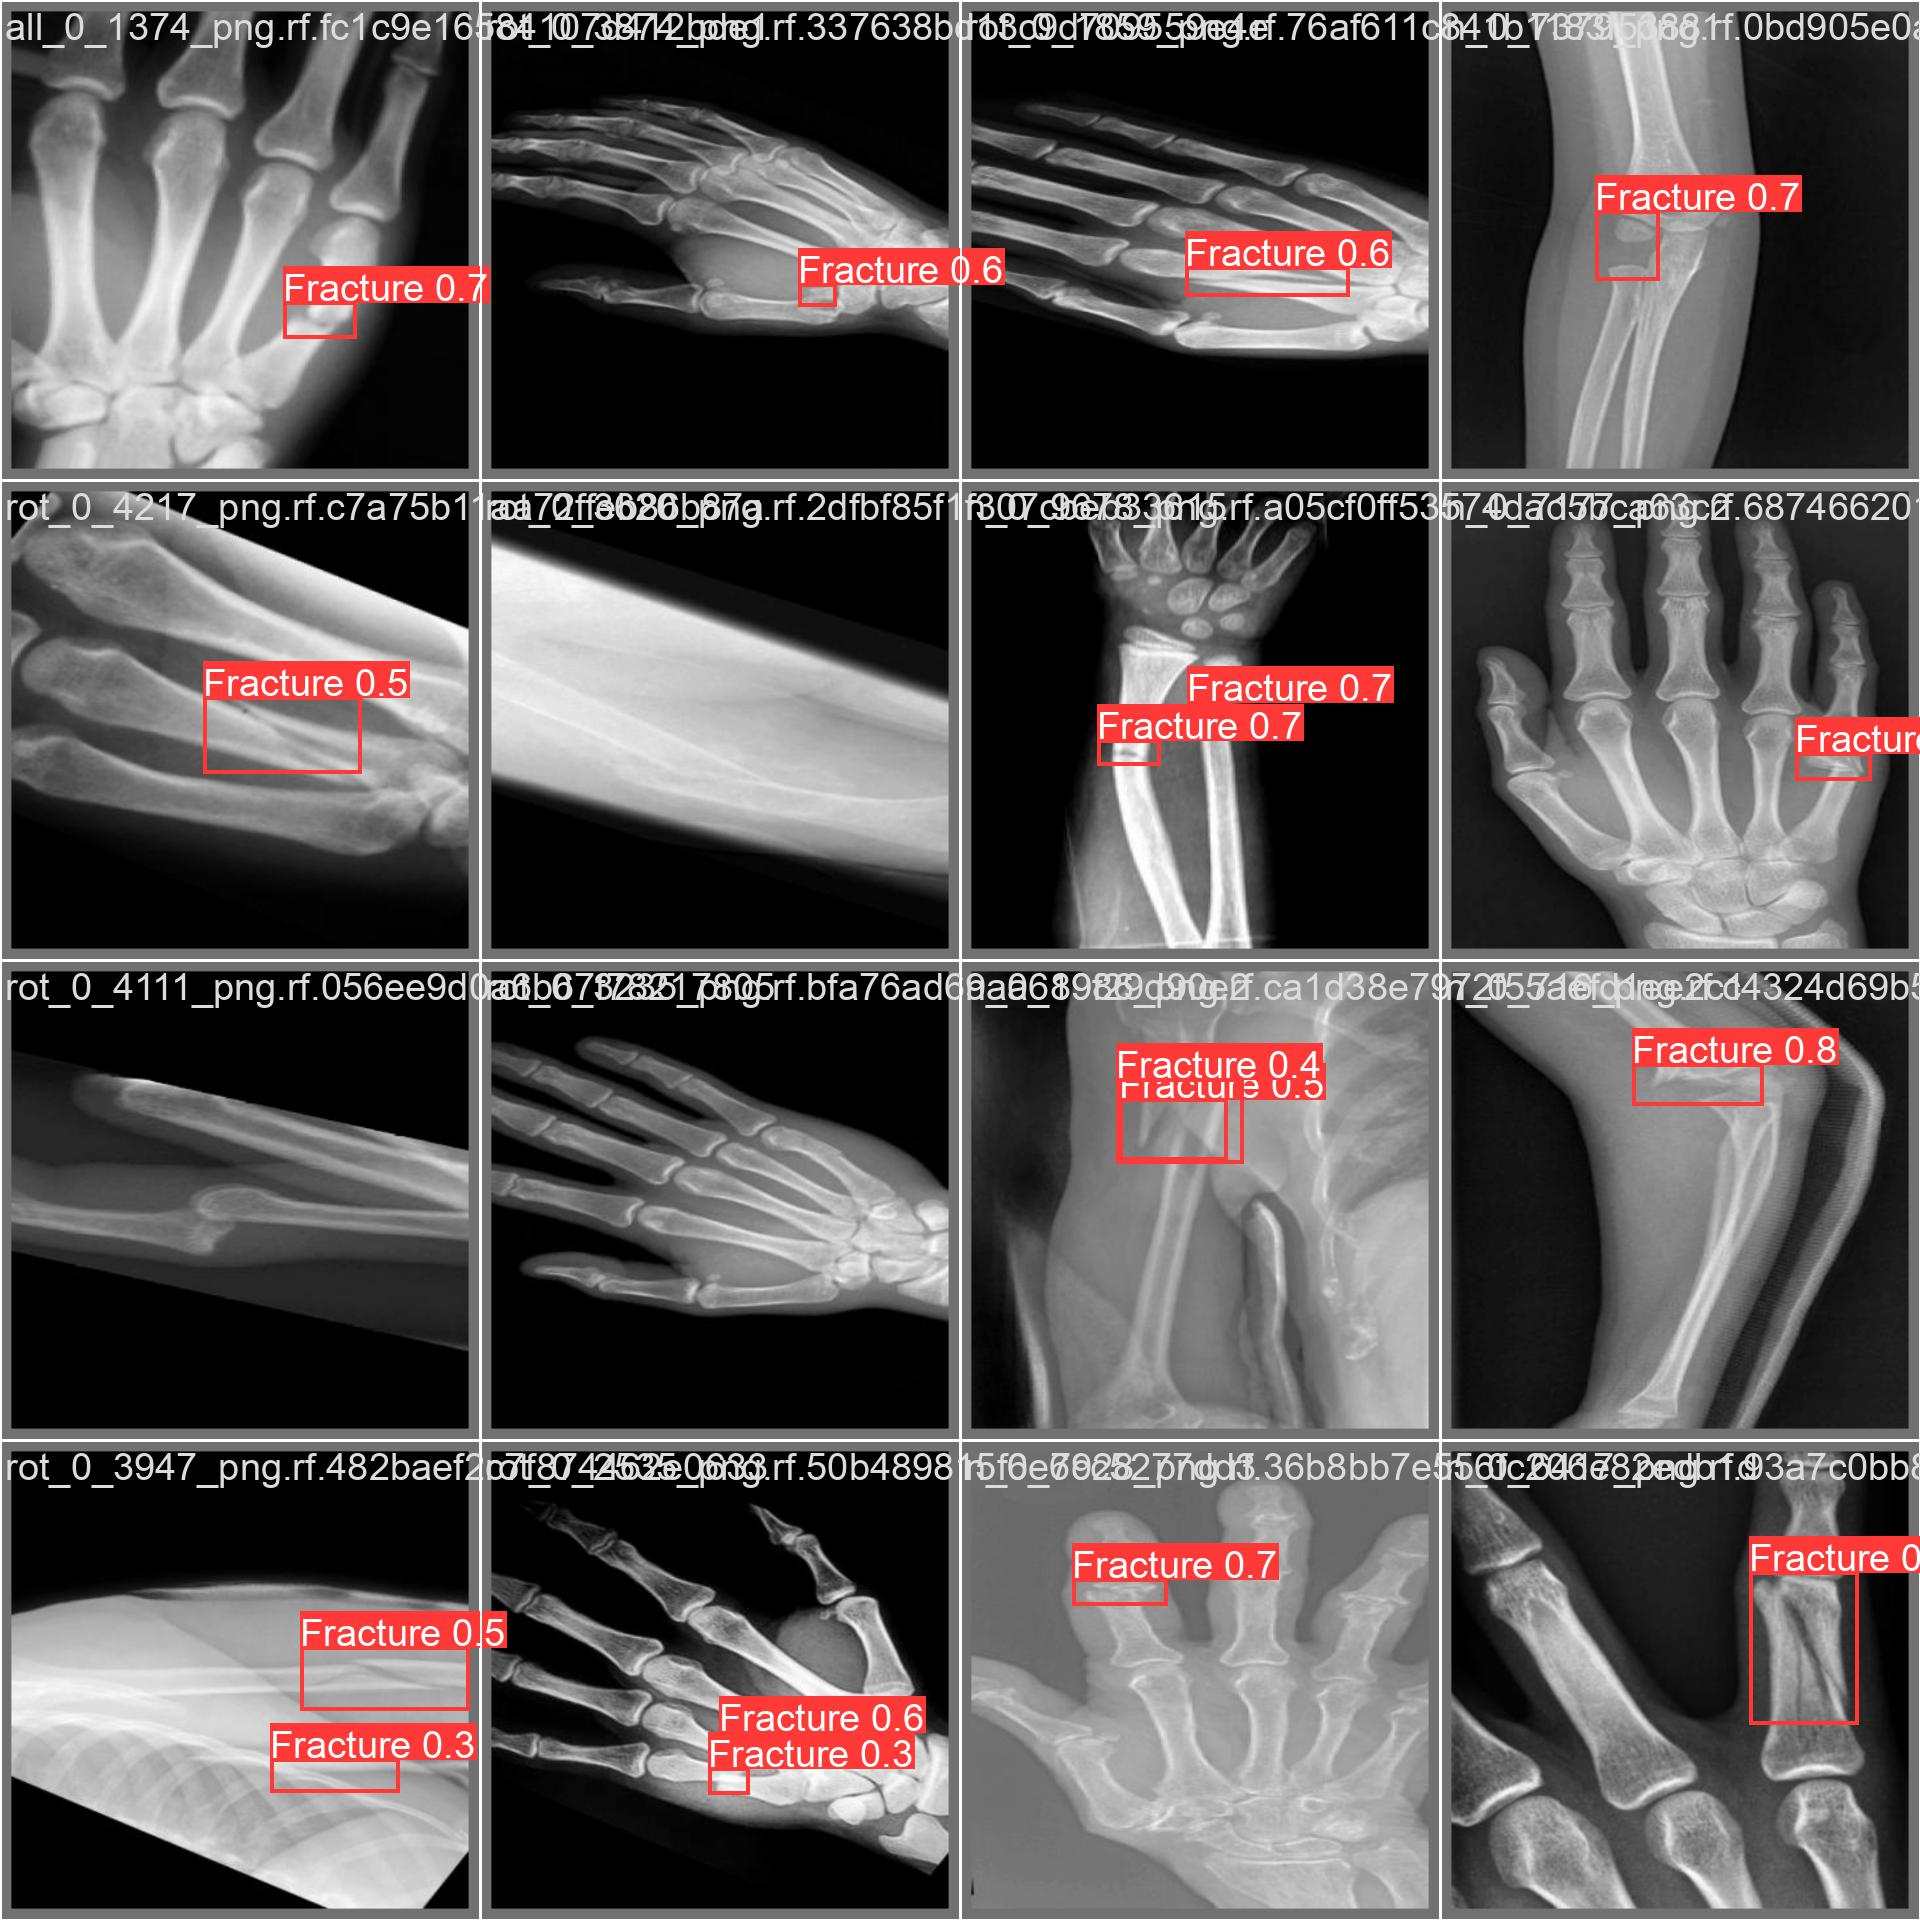

In [ ]:
Image(filename=f'/content/drive/MyDrive/BitirmeProjesi/runs/detect/train7/val_batch0_pred.jpg', width=400)

### 9. En iyi model ile validasyonun yapılması
En iyi performansa sahip model ve en son model weights klasöründe saklanmaktadır. En iyi modeli doğrulama veriseti kalibre edelim

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/BitirmeProjesi/runs/detect/train7/weights/best.pt data=/content/drive/MyDrive/BitirmeProjesi/Bone_fracture/data.yaml

Ultralytics YOLOv8.0.98 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/drive/MyDrive/BitirmeProjesi/Bone_fracture/valid/labels.cache... 99 images, 0 backgrounds, 0 corrupt: 100% 99/99 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:06<00:00,  1.13it/s]
                   all         99        117      0.852       0.74      0.785      0.373
Speed: 2.8ms preprocess, 33.7ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/val


### 10. Test verisi ile modelin test edilmesi
Test sonucunda oluşan verileri inceleyelim

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/BitirmeProjesi/runs/detect/train7/weights/best.pt conf=0.25 source='/content/drive/MyDrive/BitirmeProjesi/Bone_fracture/test/images'

Ultralytics YOLOv8.0.98 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/156 /content/drive/MyDrive/BitirmeProjesi/Bone_fracture/test/images/all_0_1142_png.rf.4ba726be944734d8df455b77cc49a54f.jpg: 640x640 2 Fractures, 62.9ms
image 2/156 /content/drive/MyDrive/BitirmeProjesi/Bone_fracture/test/images/all_0_1285_png.rf.199b6d0816f2fddd475e6c3e6047ebdf.jpg: 640x640 (no detections), 62.9ms
image 3/156 /content/drive/MyDrive/BitirmeProjesi/Bone_fracture/test/images/all_0_157_png.rf.fa0c268e78529c31b78522a3a718e992.jpg: 640x640 2 Fractures, 63.1ms
image 4/156 /content/drive/MyDrive/BitirmeProjesi/Bone_fracture/test/images/all_0_1640_png.rf.b2d829f022772b47dd885f984ea1de26.jpg: 640x640 1 Fracture, 63.0ms
image 5/156 /content/drive/MyDrive/BitirmeProjesi/Bone_fracture/test/images/all_0_2324_png.rf.64c3541a9e2a4eafb1730138f27ac1e5.jpg: 640x640 4 Fractures, 62.9ms
image 6/156 /content/drive/M

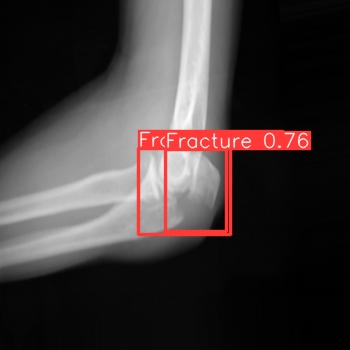

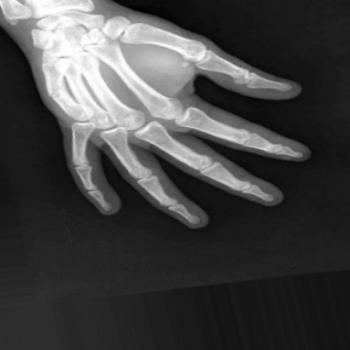

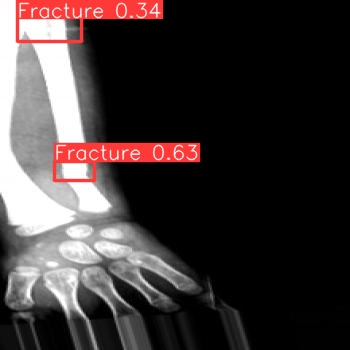

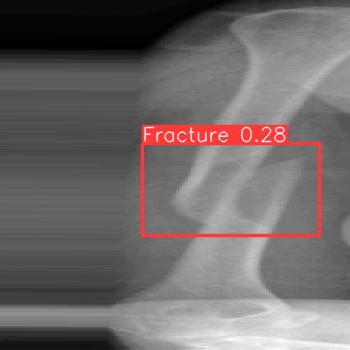

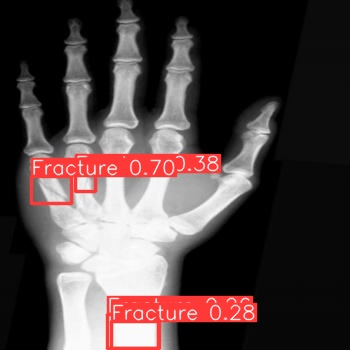

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=400))
      print("\n")

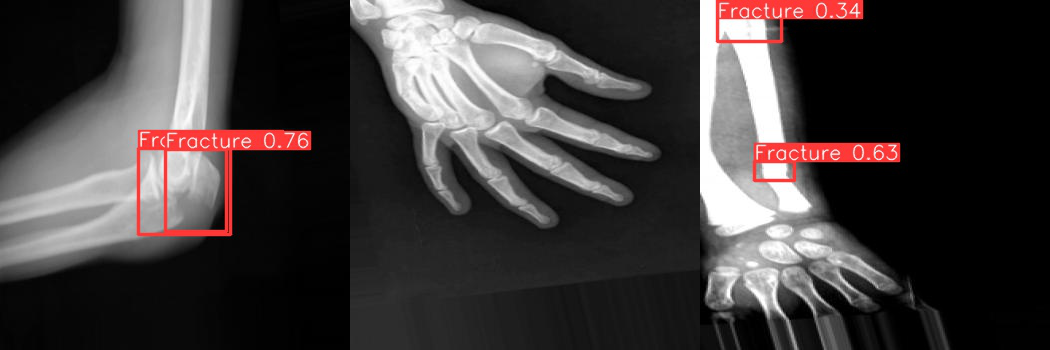

In [7]:
import glob
from PIL import Image

image_paths = glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]
images = []

for image_path in image_paths:
    image = Image.open(image_path)
    images.append(image)

# Resimleri yan yana birleştirme
total_width = sum(image.width for image in images)
max_height = max(image.height for image in images)

merged_image = Image.new('RGB', (total_width, max_height))

x_offset = 0
for image in images:
    merged_image.paste(image, (x_offset, 0))
    x_offset += image.width


merged_image.show()
